In [1]:
import sys
sys.version

'3.7.2 (default, Dec 29 2018, 06:19:36) \n[GCC 7.3.0]'

In [2]:
import attr
#attr.

In [3]:
#import tcod, color
#import tcod.console as console
from ipykernel.eventloops import register_integration
import attr
from gameclock import GameClock
from MapChunk import PolygonMap
import random as rand
import numpy as np

import IPython.core
shell = IPython.core.getipython.get_ipython()


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


matplotlib.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['figure.dpi'] = 120

%load_ext autoreload
%autoreload 2


# Simple Interactive Application With Canvas

python-tdl wants one to call tdl.init() to set up the root console.

For event handling the python-tdl way is to subclass tdl.App. The action happens
in `tdl.App.run_once`, but the time tracking is simple and would probably
benefit from the inclusion of GameClock.


In [ ]:
%run ipy_app.py
app = InteractiveApp(shell.kernel)
app.init_root(width=80, height=80, show_credits=False)
app.run()

/mnt/c/Users/mille/Dropbox/Projects/Islands/ipy_app.py:1: DeprecationWarning: The tdl module has been deprecated.
  import tdl, tcod


We can update and draw to the application by manipulating the canvas attribute,
which is an off-screen representation that is periodically blitted onto the root
console.

In [4]:
app.canvas.clear()

In [5]:
app.canvas.draw_rect(0, 1, 10, 10, ".", fg=tcod.light_amber)
app.canvas.draw_rect(0, 0, 15, 3, None, bg=tcod.white)
app.canvas.draw_str(10, 10, "Help me!")
app.canvas.draw_str(10, 11, "Another line.")
app.canvas.draw_frame(20,0, 10, 10, None, fg=tcod.white, bg=tcod.grey)

In [6]:
app.canvas.get_char(10,10)

(72, (255, 255, 255), (0, 0, 0))

## Heightmaps

In [7]:
h2 = tcod.heightmap_new(80, 80)
h2[:] = 0

In [8]:
h2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
tcod.heightmap_add_hill(h2, 20, 20, 5, 5)

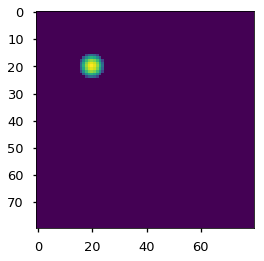

In [10]:
plt.imshow(h2)

In [11]:
tcod.heightmap_rain_erosion(h2, 100, 0.5, 0.1)

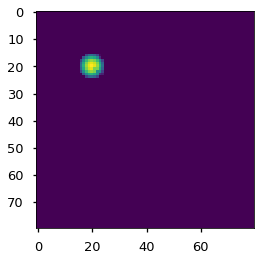

In [12]:
plt.imshow(h2)

In [13]:
from tdl.noise import Noise

n = Noise()

In [14]:
n.get_point(2.3,2.4,0)

0.38356614112854004

In [15]:
hn = tcod.heightmap_new(80, 80)
hn[:] = 0.0
hn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
for i in range(rand.randint(100, 1000)):
    x, y = rand.random()*80, rand.random()*80
    radius = rand.random()*20
    height = rand.random()*10
    print("({}, {}) = {}, {}".format(x, y, radius, height))
    tcod.heightmap_add_hill(hn, x, y, radius, height)

(75.99865655983494, 25.576420293015776) = 1.5951903741860263, 4.919641364878436
(27.679159332647572, 65.82654953127512) = 6.881719420265247, 1.5870653389398792
(54.72561207378796, 59.042237888879384) = 11.811474107622065, 6.886360632341663
(29.719765197374286, 46.744769836269015) = 9.195532683330224, 9.976257081964913
(23.614345289375454, 6.063273371826705) = 18.933685417753882, 1.576514200970499
(28.891818171625374, 25.699554042774473) = 18.189089783876668, 4.917096433095615
(52.94595642074589, 25.357173145159155) = 13.727203318845831, 5.9288646171283546
(16.783850328547842, 3.5490039570248033) = 15.580124079951325, 5.897918035579984
(71.98888541236076, 63.585441497306704) = 6.125504341755892, 1.8388382632823308
(35.622634196413856, 56.38836125905773) = 5.254917452526526, 1.9833636798099052
(14.232562248886538, 34.76451360820397) = 0.09839944484526075, 3.200317755268479
(6.949663351608306, 55.38649652910194) = 19.52198263280222, 0.43393881266585943
(76.81637164148893, 32.6046040601527

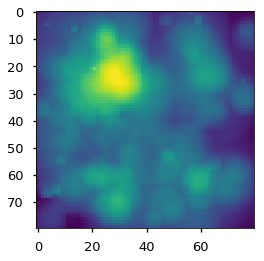

In [17]:
plt.imshow(hn)


In [18]:
tcod.heightmap_rain_erosion(hn, 80*80, 0.05, 0.01)

In [19]:
np.shape(hn)

(80, 80)

In [20]:
min, max = tcod.heightmap_get_minmax(hn)
width, height = np.shape(hn)
for i in range(width):
    for j in range(height):
        color = tcod.color_lerp(tcod.dark_blue, tcod.white, hn[i, j]/max)
        app.canvas.draw_char(i, j, ' ', fg=tcod.white, bg=color)

/home/millejoh/miniconda3/envs/islands/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Use `hm.min()` and `hm.max()` instead.
  """Entry point for launching an IPython kernel.


## Integrating PolygonMap with InteractiveApp

In [21]:
map = PolygonMap(feature_cnt=500, width=100.0, height=100.0)

In [22]:
f = map[0,0]
f

TerrainFeatures(idx=466, parent=<MapChunk.PolygonMap object at 0x7f785f4a2e10>, elevation=0.0, water=False, ocean=False, precipitation=0.0, temperature=0.0, color=0.0)

In [23]:
f.__setattr__('elevation', 10)
f.__getattribute__('elevation')

10

In [24]:
elev = map.terrain(0,0,'elevation')
elev

10

In [25]:
hm = map.terrain_to_hm('elevation')
(hm[0,0], hm[0,1], hm[0,9])

(10.0, 10.0, 0.0)

In [26]:
import random as rand

map = PolygonMap(feature_cnt=int((80*60)/10), width=80, height=60)
hn = map.terrain_to_hm('elevation')

for i in range(rand.randint(20, 100)):
    x, y = rand.randint(0, 80), rand.randint(0, 60)
    radius = rand.randint(0, 20)
    height = rand.randint(0, 10)
    hn.add_hill(x, y, radius, height)

map.hm_to_terrain(hn, 'elevation')

AttributeError: 'numpy.ndarray' object has no attribute 'add_hill'

In [28]:
(hn[0,4], map[0,4])

(0.0,
 TerrainFeatures(idx=154, parent=<MapChunk.PolygonMap object at 0x7f785f2bbbe0>, elevation=0.0, water=False, ocean=False, precipitation=0.0, temperature=0.0, color=0.0))

Game logic updates:

1. Update world state.
2. Update agents.
3. Update canvas.
4. Draw (this is InteractiveApp.my_update)



### Canvas Update

A naive, slow canvas update:

In [29]:
def canvas_update(canvas):
    canvas.clear()
    canvas.draw_terrain()
    canvas.draw_features() # Features are things like walls, trees
    canvas.draw_agents()

# Sample App Using Polygon Maps

In [30]:
import tdl, tcod
from gameclock import GameClock
from MapChunk import PolygonMap, gEntity
from ipy_app import WorldState, GameApp
import numpy as np

In [ ]:
state = WorldState(80,40)
app = GameApp(shell.kernel)
app.init_root(state, width=80, height=40, show_credits=False)
app.run()

Generate a very basic elevation map.

In [31]:
import random as rand
hn = state.wmap.terrain_to_hm('elevation')

for i in range(rand.randint(20, 100)):
    x, y = rand.randint(0, 80), rand.randint(0, 60)
    radius = rand.randint(0, 20)
    height = rand.randint(0, 10)
    hn.add_hill(x, y, radius, height)

state.wmap.hm_to_terrain(hn, 'elevation')

ERROR! Session/line number was not unique in database. History logging moved to new session 1104


AttributeError: 'numpy.ndarray' object has no attribute 'add_hill'

In [32]:
state.draw_terrain()

AttributeError: 'numpy.ndarray' object has no attribute 'get_minmax'

In [33]:
player = gEntity(eclass='actor', name='Player')
orc = gEntity(eclass='actor', name='Orc')
player.pos = np.array((5,5))
player.glyph = '@'
orc.glyph = 'o'
orc.pos = np.array((20, 20))
orc.color = tcod.black

state.actors = {}
state.actors[player._id] = player
state.actors[orc._id] = orc

AttributeError: 'gEntity' object has no attribute '_id'

In [34]:
orc._id

AttributeError: 'gEntity' object has no attribute '_id'

In [12]:
state.draw_actors()

In [13]:
orc.move(1, 0)
state.draw_actors()

ValueError: operands could not be broadcast together with shapes (2,) (3,) (2,) 

Now animate!

In [145]:
def move_me(actor):
    dx = rand.choice([1, 0, -1])
    dy = rand.choice([1, 0, -1])
    actor.move(dx, dy)

def move_actors(dt):
    for _, actor in state.actors.items():
        move_me(actor)
    state.draw_actors()

In [146]:
app.clock.schedule_interval(move_actors, 1.0)

In [147]:
app.clock.schedules

[]

In [3]:
import attr

In [4]:
attr.__version__

'16.3.0'

In [1]:
import esper